DS240 Final Exam - Section 1
Robert Daniels

In [610]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [611]:
df = pd.read_csv("kc_house_data.csv")

Initial info check: Sqft_above appears to be missing 2 values

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

First few records to sample

In [613]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Running initial correlation to determine attributes worth looking into further. Looking at price column, items > .5 would be worth looking into

In [614]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010830,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477616,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685363,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876644,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183511,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523899,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072074,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167648,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158206,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Items >.5 : bathrooms, sqft_living, grade, sqft_above, sqft_living15. Drop other attributes. Dropping sqft_living15 as this data appears too messy for time allotted. 

In [615]:
df = df[['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above']]

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   grade        21613 non-null  int64  
 4   sqft_above   21611 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 844.4 KB


Fill in sqft_above null values with mean.

In [617]:
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].mean())

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   grade        21613 non-null  int64  
 4   sqft_above   21613 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 844.4 KB


Shuffle the DataFrame

In [619]:
df = df.sample(frac = 1)

<AxesSubplot:>

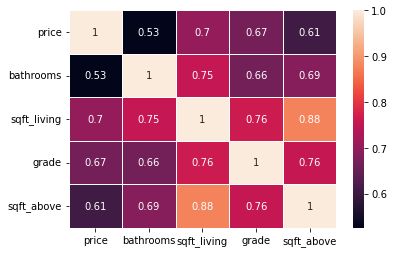

In [620]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

In [621]:
x = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above']]
y = df['price']

Train the model

Intercept :  -643498.8494308001
[-3.64605507e+04  2.46922845e+02  1.13570750e+05 -7.02465080e+01]
price -36460.550722099004
bathrooms 246.92284540517207
sqft_living 113570.75017258394
grade -70.24650802823291
Variance:  0.552115387202746
R2 score :  0.5513229980092905
MSE:  62393434969.11245


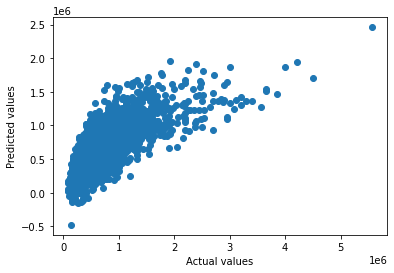

In [622]:

columnListing = df.columns.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(x_train, y_train)
print("Intercept : ",lm.intercept_)
print(lm.coef_)

for i in range (len(columnListing) - 1):
    print(columnListing[i], lm.coef_[i])

y_pred = lm.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Not the best, the r2 score is just barely over .5 at .535, the mean square error is quite high.  trying with just sqft_living, grade

Intercept :  -596283.7496723718
[  183.75581299 98087.74253601]
Variance:  0.5410208962078453
R2 score :  0.5402367270385471
MSE:  63935101967.4075


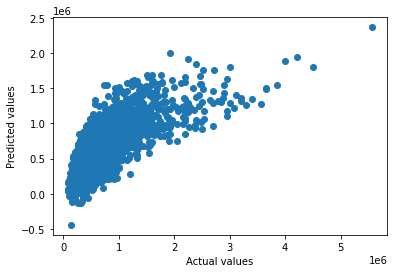

In [623]:
df2 = df[['price', 'sqft_living', 'grade']]

x = df2[['sqft_living', 'grade']]
y = df2['price']

columnListing = df.columns.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(x_train, y_train)
print("Intercept : ",lm.intercept_)
print(lm.coef_)


y_pred = lm.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )



Turns out that's not much better, perhaps a little worse. 
Possible reason? Outliers could be a reason. Visualize outliers with a boxplot. Also possible: use scipy.stats, find z score, mask the data frame with the abs value of the z score with threshold

<AxesSubplot:xlabel='sqft_above'>

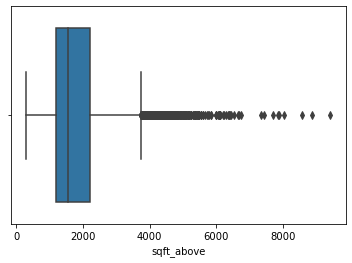

In [624]:
sns.boxplot(x = df['sqft_above'])